In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 0. Загрузка, предобработка и визуализация обучающих и тестовых данных

In [313]:
df = pd.read_excel('data.xls')
df

,Дата\Час,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2024-01-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,2024-01-02,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,2024-01-03,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,2024-01-04,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,2024-01-05,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,2024-01-06,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,2024-01-07,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,2024-01-08,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,2024-01-09,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [314]:
df = df.drop(columns='Дата\Час')
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,71.569,83.507,78.556,84.909,90.564,88.909,82.097,92.617,82.141,73.942
1,66.159,60.323,59.934,58.991,65.926,68.814,71.955,83.094,91.835,84.601,...,81.973,81.159,81.542,85.174,86.396,88.637,99.631,85.428,79.096,75.569
2,71.343,63.534,62.930,60.751,66.287,75.827,78.634,83.226,94.694,91.789,...,93.846,92.801,97.032,99.990,95.810,93.359,95.478,106.440,88.563,74.330
3,75.556,63.900,64.464,62.335,70.257,78.144,83.858,82.886,89.696,90.817,...,83.695,81.513,84.233,89.340,95.338,91.403,102.215,104.527,94.472,79.269
4,71.686,68.831,65.909,62.263,69.186,75.471,82.833,84.923,93.299,95.227,...,78.899,85.246,79.152,93.942,97.796,93.284,99.573,100.742,84.996,78.969
5,73.126,65.977,60.801,58.350,67.161,73.432,82.197,84.655,92.029,92.149,...,82.673,93.242,99.498,85.793,85.644,87.579,90.410,98.107,83.345,76.698
6,70.194,64.076,60.801,57.808,66.078,72.292,81.361,82.558,86.909,83.413,...,79.911,83.685,86.571,87.098,89.678,90.833,87.884,94.471,79.111,71.057
7,63.734,59.919,59.467,57.143,65.526,72.938,76.957,81.825,89.929,90.488,...,81.346,82.652,79.955,83.505,89.544,87.480,99.437,83.900,81.100,73.498
8,66.453,60.866,60.658,61.550,65.994,73.093,81.675,89.286,103.758,136.804,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [315]:
data = np.array(df).flatten()
data, data.shape

(array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  83.915,  74.879,
         71.569,  83.507,  78.556,  84.909,  90.564,  88.909,  82.097,
         92.617,  82.141,  73.942,  66.159,  60.323,  59.934,  58.991,
         65.926,  68.814,  71.955,  83.094,  91.835,  84.601,  81.881,
         79.911,  88.205,  81.72 ,  81.973,  81.159,  81.542,  85.174,
         86.396,  88.637,  99.631,  85.428,  79.096,  75.569,  71.343,
         63.534,  62.93 ,  60.751,  66.287,  75.827,  78.634,  83.226,
         94.694,  91.789,  90.805,  87.272,  84.488,  82.505,  93.846,
         92.801,  97.032,  99.99 ,  95.81 ,  93.359,  95.478, 106.44 ,
         88.563,  74.33 ,  75.556,  63.9  ,  64.464,  62.335,  70.257,
         78.144,  83.858,  82.886,  89.696,  90.817,  86.275,  87.51 ,
         91.513,  84.024,  83.695,  81.513,  84.233,  89.34 ,  95.338,
         91.403, 102.215, 104.527,  94.472,  79.269,  71.686,  68.831,
      

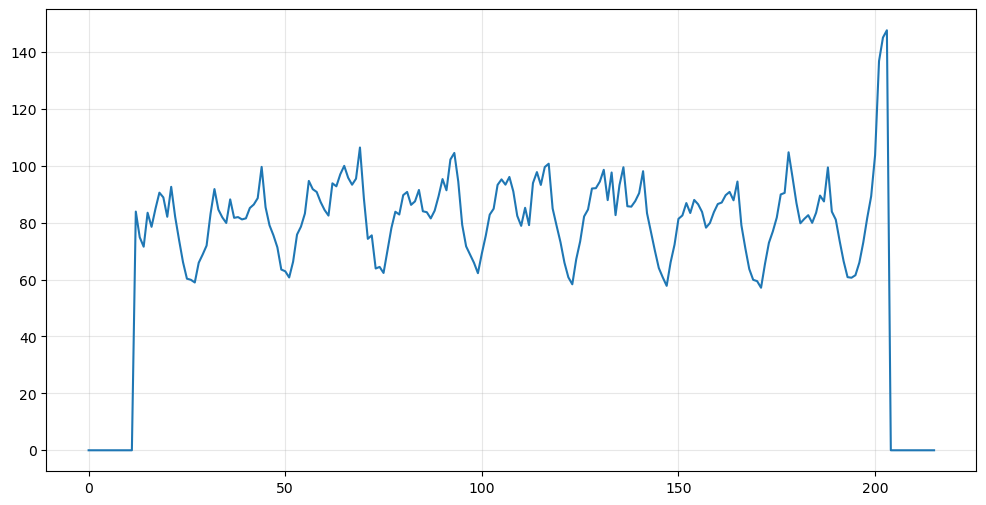

In [316]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.grid('on', alpha=.3);

Нули слева и справа будут вводить в заблуждение модель, избавимся от них

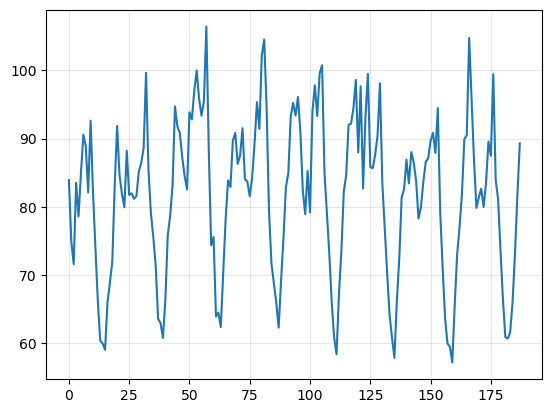

In [317]:
data = data[12:200]

plt.plot(data)
plt.grid('on', alpha=.3);

In [318]:
data, len(data)

(array([ 83.915,  74.879,  71.569,  83.507,  78.556,  84.909,  90.564,
         88.909,  82.097,  92.617,  82.141,  73.942,  66.159,  60.323,
         59.934,  58.991,  65.926,  68.814,  71.955,  83.094,  91.835,
         84.601,  81.881,  79.911,  88.205,  81.72 ,  81.973,  81.159,
         81.542,  85.174,  86.396,  88.637,  99.631,  85.428,  79.096,
         75.569,  71.343,  63.534,  62.93 ,  60.751,  66.287,  75.827,
         78.634,  83.226,  94.694,  91.789,  90.805,  87.272,  84.488,
         82.505,  93.846,  92.801,  97.032,  99.99 ,  95.81 ,  93.359,
         95.478, 106.44 ,  88.563,  74.33 ,  75.556,  63.9  ,  64.464,
         62.335,  70.257,  78.144,  83.858,  82.886,  89.696,  90.817,
         86.275,  87.51 ,  91.513,  84.024,  83.695,  81.513,  84.233,
         89.34 ,  95.338,  91.403, 102.215, 104.527,  94.472,  79.269,
         71.686,  68.831,  65.909,  62.263,  69.186,  75.471,  82.833,
         84.923,  93.299,  95.227,  93.383,  96.088,  91.   ,  82.422,
      

# 1. Разбиение выборки на обучающие и тестовые подвыборки

In [319]:
train_size = 130
bias = 5

train_data = data[:train_size]
val_data = data[train_size + bias:]

train_data.shape, val_data.shape

((130,), (53,))

In [320]:
hist = 7           # длина истории
future = 1          # горизонт предсказания

# параметры обучения модели
batch_size = 32
epochs = 10

In [321]:
start = hist + future
end = start + train_size

print(start, end)

X_train = train_data
y_train = data[start:end]

x_end = len(val_data) - hist - future
label_start = len(train_data) + bias + hist + future
print(x_end, label_start)

X_val = val_data[:x_end]
y_val = data[label_start:]

8 138
45 143


In [322]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((130,), (130,), (45,), (45,))

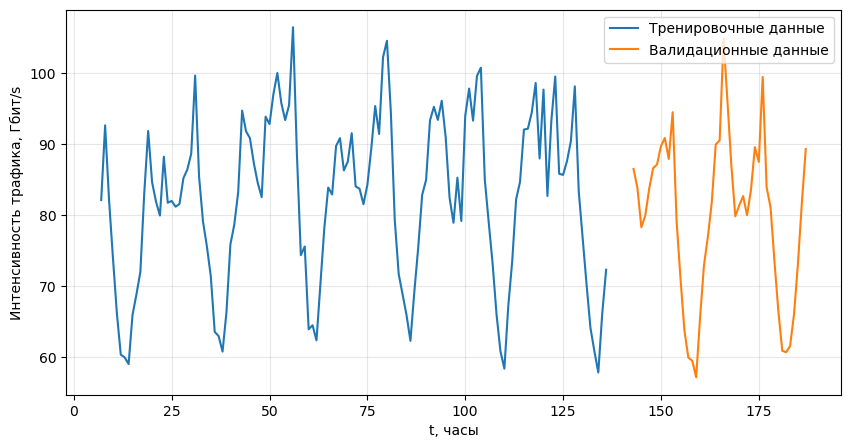

In [323]:
plt.figure(figsize=(10,5))
plt.plot(range(hist, y_train.shape[0] + hist), y_train, label='Тренировочные данные')
plt.plot(range(y_train.shape[0] + hist + bias + future,
               y_train.shape[0] + hist + bias + future + y_val.shape[0]),
               y_val,
               label='Валидационные данные')
plt.grid('on', alpha=.3)
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/s')
plt.legend(loc='best');


# 2. Формирование `timeseries_dataset`

In [324]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

dataset_train = timeseries_dataset_from_array(
    X_train, y_train,
    sequence_length=hist,
    sampling_rate=1,
    batch_size=batch_size
)

dataset_val = timeseries_dataset_from_array(
    X_val, y_val,
    sequence_length=hist,
    sampling_rate=1,
    batch_size=batch_size
)

In [325]:
for batch in dataset_train:
    inputs, targets = batch
    print('Input shape: ', inputs.shape)
    print(inputs[1])
    print("Target shape:", targets.shape)
    print(targets[1])
    break

Input shape:  (32, 7)
tf.Tensor([74.879 71.569 83.507 78.556 84.909 90.564 88.909], shape=(7,), dtype=float64)
Target shape: (32,)
tf.Tensor(92.617, shape=(), dtype=float64)


# 3. Конструирование и обучение ИНС

In [333]:
from keras.layers import LSTM, Conv1D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_mae', patience=5)

model = Sequential()
model.add(LSTM(128, input_shape = (inputs.shape[1], 1), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Dropout(.5))
model.add(Conv1D(64, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_77 (LSTM)              (None, 7, 128)            66560     
                                                                 
 lstm_78 (LSTM)              (None, 7, 128)            131584    
                                                                 
 conv1d_52 (Conv1D)          (None, 5, 32)             12320     
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 conv1d_53 (Conv1D)          (None, 5, 64)             2112      
                                                                 
 flatten_23 (Flatten)        (None, 320)               0         
                                                                 
 dense_46 (Dense)            (None, 10)              

In [334]:
history = model.fit(
    dataset_train,
    epochs=20,
    validation_data=dataset_val,
    callbacks=[early_stop]
)

Epoch 1/20
4/4 [==============================] - 7s 428ms/step - loss: 6995.7188 - mae: 82.8614 - val_loss: 6538.2300 - val_mae: 80.0847
Epoch 2/20
4/4 [==============================] - 0s 57ms/step - loss: 6784.2812 - mae: 81.5894 - val_loss: 6229.8652 - val_mae: 78.1359
Epoch 3/20
4/4 [==============================] - 0s 61ms/step - loss: 6283.2397 - mae: 78.4738 - val_loss: 5609.4263 - val_mae: 74.0602
Epoch 4/20
4/4 [==============================] - 0s 73ms/step - loss: 5409.9722 - mae: 72.6436 - val_loss: 4598.8911 - val_mae: 66.8918
Epoch 5/20
4/4 [==============================] - 0s 128ms/step - loss: 3942.0967 - mae: 61.6438 - val_loss: 3167.7605 - val_mae: 55.1676
Epoch 6/20
4/4 [==============================] - 0s 76ms/step - loss: 2366.0010 - mae: 46.8368 - val_loss: 1531.3083 - val_mae: 37.5111
Epoch 7/20
4/4 [==============================] - 0s 79ms/step - loss: 762.0199 - mae: 24.3023 - val_loss: 326.0284 - val_mae: 15.9134
Epoch 8/20
4/4 [=========================

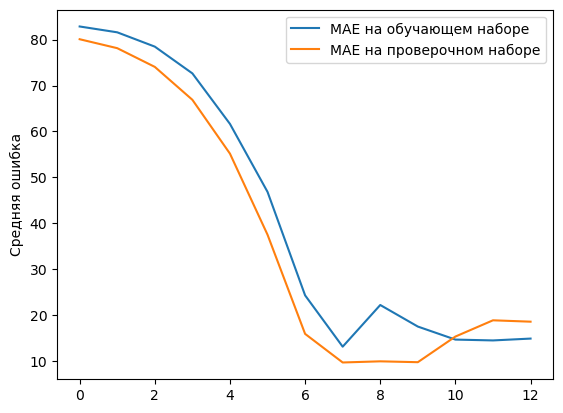

In [335]:
plt.plot(history.history['mae'][:],
         label='MAE на обучающем наборе')
plt.plot(history.history['val_mae'][:],
         label='MAE на проверочном наборе')

plt.ylabel('Средняя ошибка')
plt.legend();

# 4. Проверка работы ИНС

In [336]:
pred = model.predict(dataset_train)
pred_val = model.predict(dataset_val)

2/2 [==============================] - 0s 8ms/step


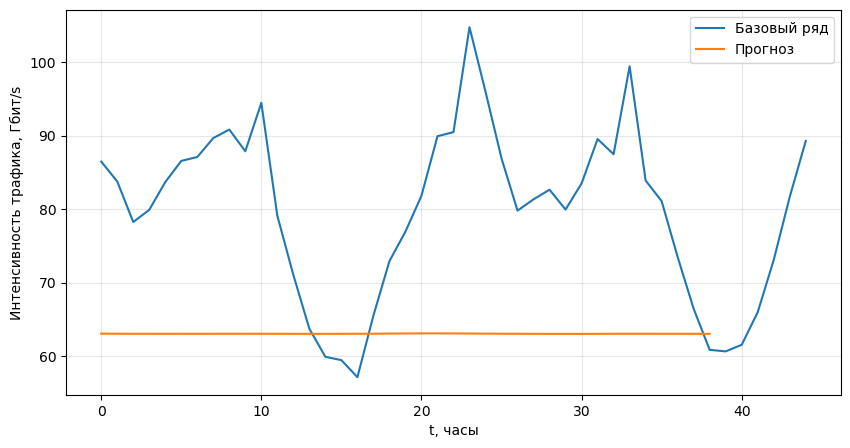

In [340]:
# валидация

start = 0
step = 60
plt.figure(figsize=(10, 5))
plt.grid('on', alpha=.3)
plt.plot(y_val[start: start + step], label='Базовый ряд')
plt.plot(pred_val[future + start: future + start + step], label='Прогноз')
plt.xlabel('t, часы')
plt.ylabel('Интенсивность трафика, Гбит/s')
plt.legend();


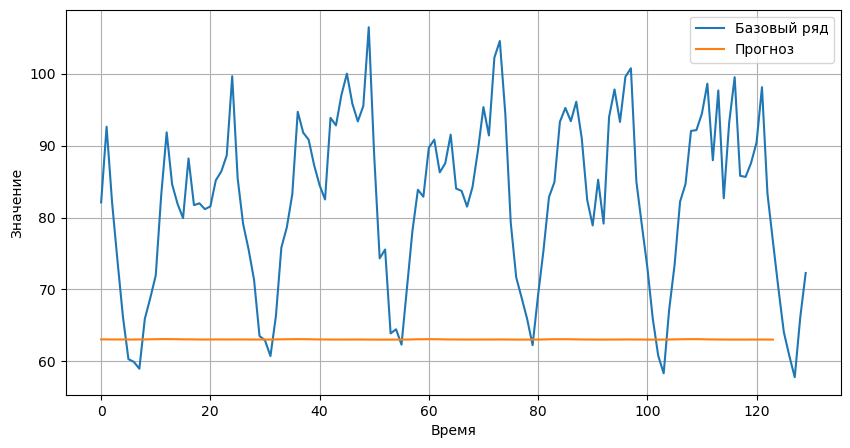

In [341]:
# на трейне

start = 0

plt.figure(figsize=(10, 5))
plt.grid('on')
plt.plot(y_train[start: train_size],
         label='Базовый ряд')
plt.plot(pred[future + start: future + train_size],
         label='Прогноз')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()